In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.preprocessing import LabelEncoder


In [61]:
df = pd.read_csv("/Users/tylerbrecker/Downloads/data.csv", low_memory=False)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [63]:
(round(df.isnull().sum() / df.shape[0] * 100, 2)).sort_values(ascending=False)

footfall       0.0
tempMode       0.0
AQ             0.0
USS            0.0
CS             0.0
VOC            0.0
RP             0.0
IP             0.0
Temperature    0.0
fail           0.0
dtype: float64

In [64]:
df[['footfall','tempMode','AQ','USS','CS','VOC','RP','IP','Temperature','fail']].describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


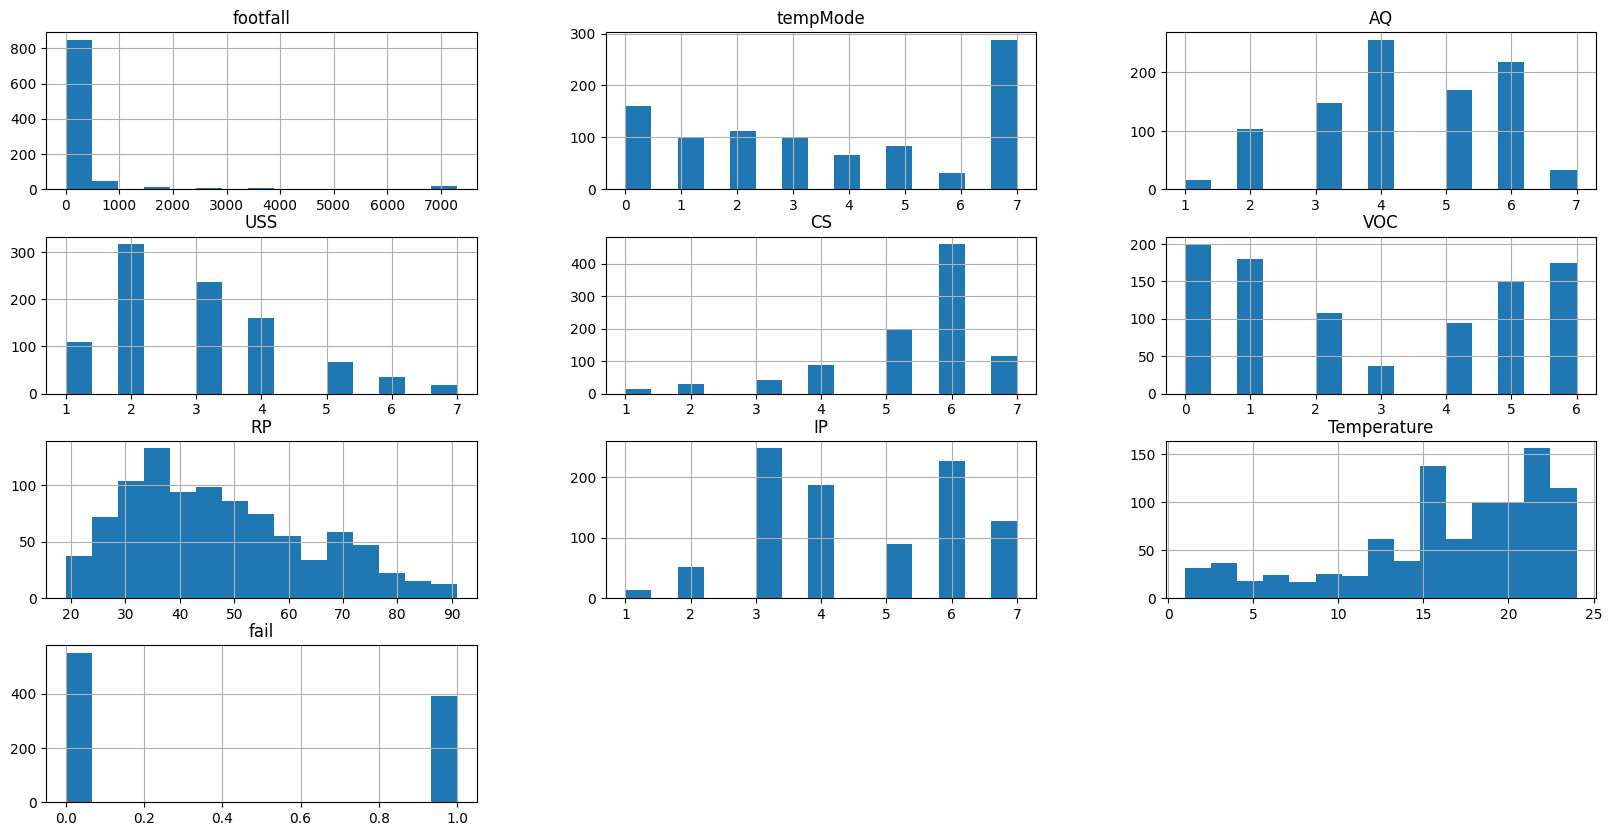

In [65]:
columns = ['footfall','tempMode','AQ','USS','CS','VOC','RP','IP','Temperature','fail']
df[columns].hist(bins=15, figsize=(20,10));

In [66]:
corr = ['footfall','tempMode','AQ','USS','CS','VOC','RP','IP','Temperature','fail']

In [67]:
corr_matrix = df.corr()
print(corr_matrix['fail'].sort_values(ascending=False))

fail           1.000000
VOC            0.797329
AQ             0.583238
Temperature    0.190257
IP             0.085624
RP             0.053668
CS             0.018855
tempMode      -0.014462
footfall      -0.073066
USS           -0.466574
Name: fail, dtype: float64


In [69]:
final_data = df[['AQ', 'VOC', 'fail']]

final_data.head()

,AQ,VOC,fail
0,7,6,1
1,3,1,0
2,2,1,0
3,3,1,0
4,5,0,0


In [71]:
x = final_data.drop('fail', axis=1).values

y = final_data['fail'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential(
    [
        Input(shape=(x_train.shape[1],)),  
        Dense(4, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)


In [89]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [90]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='loss')

model.fit(x_train, y_train, epochs=300, callbacks=[early_stopping])


Epoch 1/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.4562 - loss: 0.6781 
Epoch 2/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.5227 - loss: 0.6389
Epoch 3/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.6478 - loss: 0.6200
Epoch 4/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7625 - loss: 0.5770 
Epoch 5/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.8349 - loss: 0.5327
Epoch 6/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8718 - loss: 0.5123
Epoch 7/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.8908 - loss: 0.4723
Epoch 8/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8978 - loss: 0.4573
Epoch 9/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.8949 - loss: 0.4327
Epoch 10/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9120 - loss: 0.3846
Epoch 11/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.9036 - loss: 0.3856
Epoch 12/300
24/24 ━━━━━━━━━━━━━━━━━━━━ 0

In [92]:
model.evaluate(x_test, y_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9091 - loss: 0.2753


[0.2887234091758728, 0.9047619104385376]

In [93]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 713 (2.79 KB)

 Trainable params: 237 (948.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 476 (1.86 KB)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


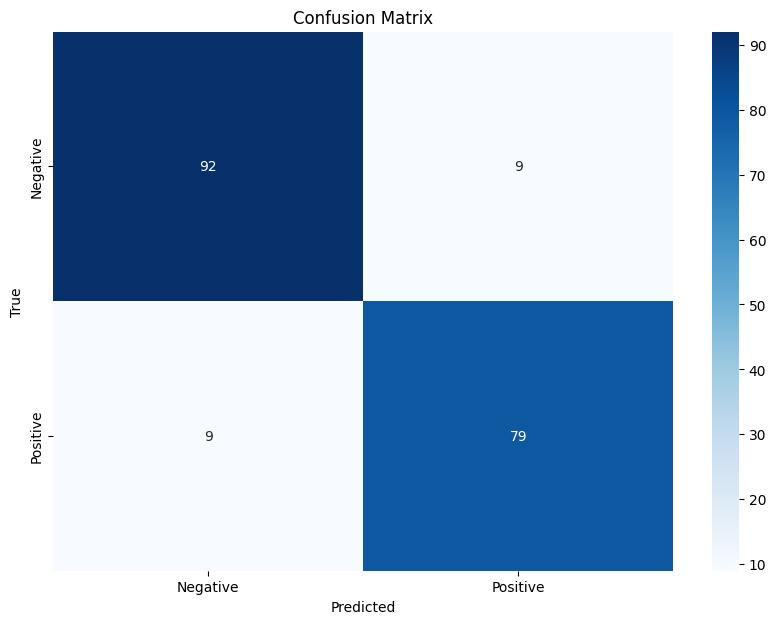

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (model.predict(x_test) > 0.5).astype(int)  # Assuming sigmoid output
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [104]:
print(np.unique(y_test))

# Convert to binary if needed
y_test = (y_test > 0.5).astype(int)

[0 1]
